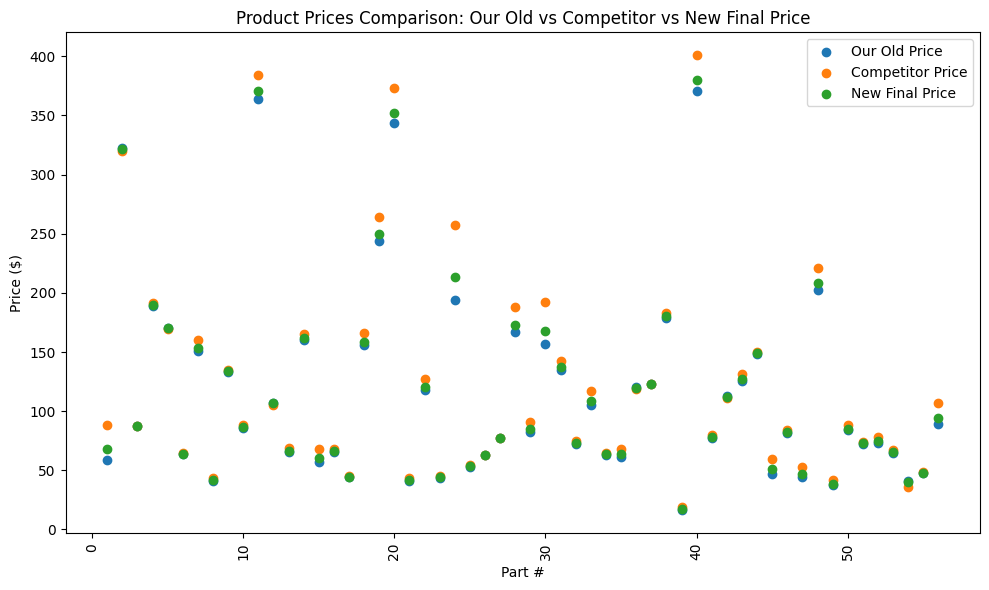

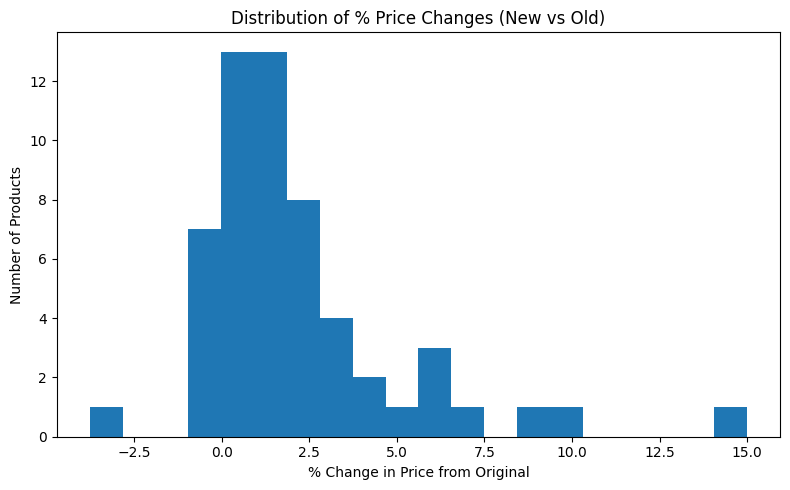

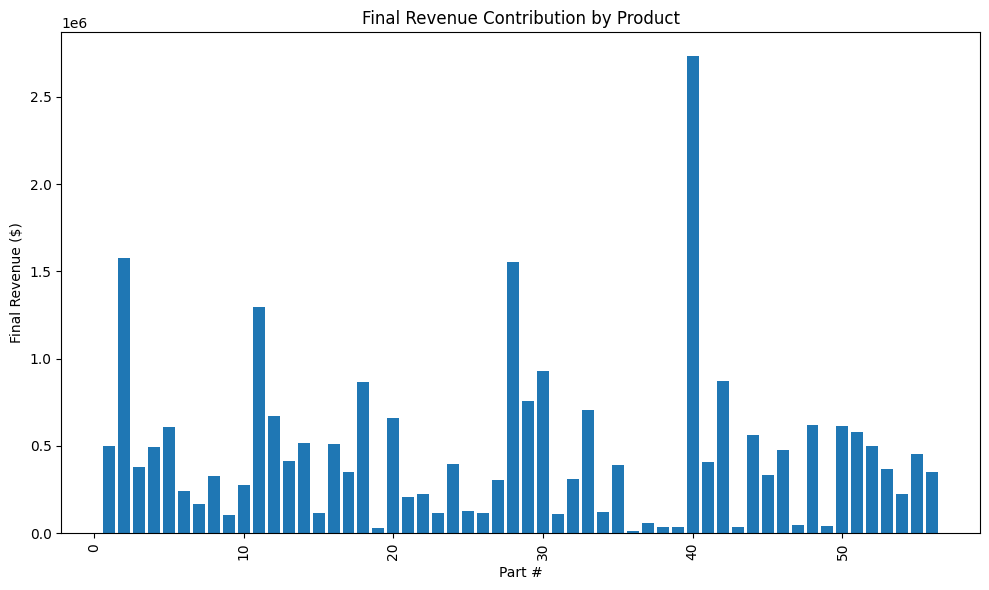

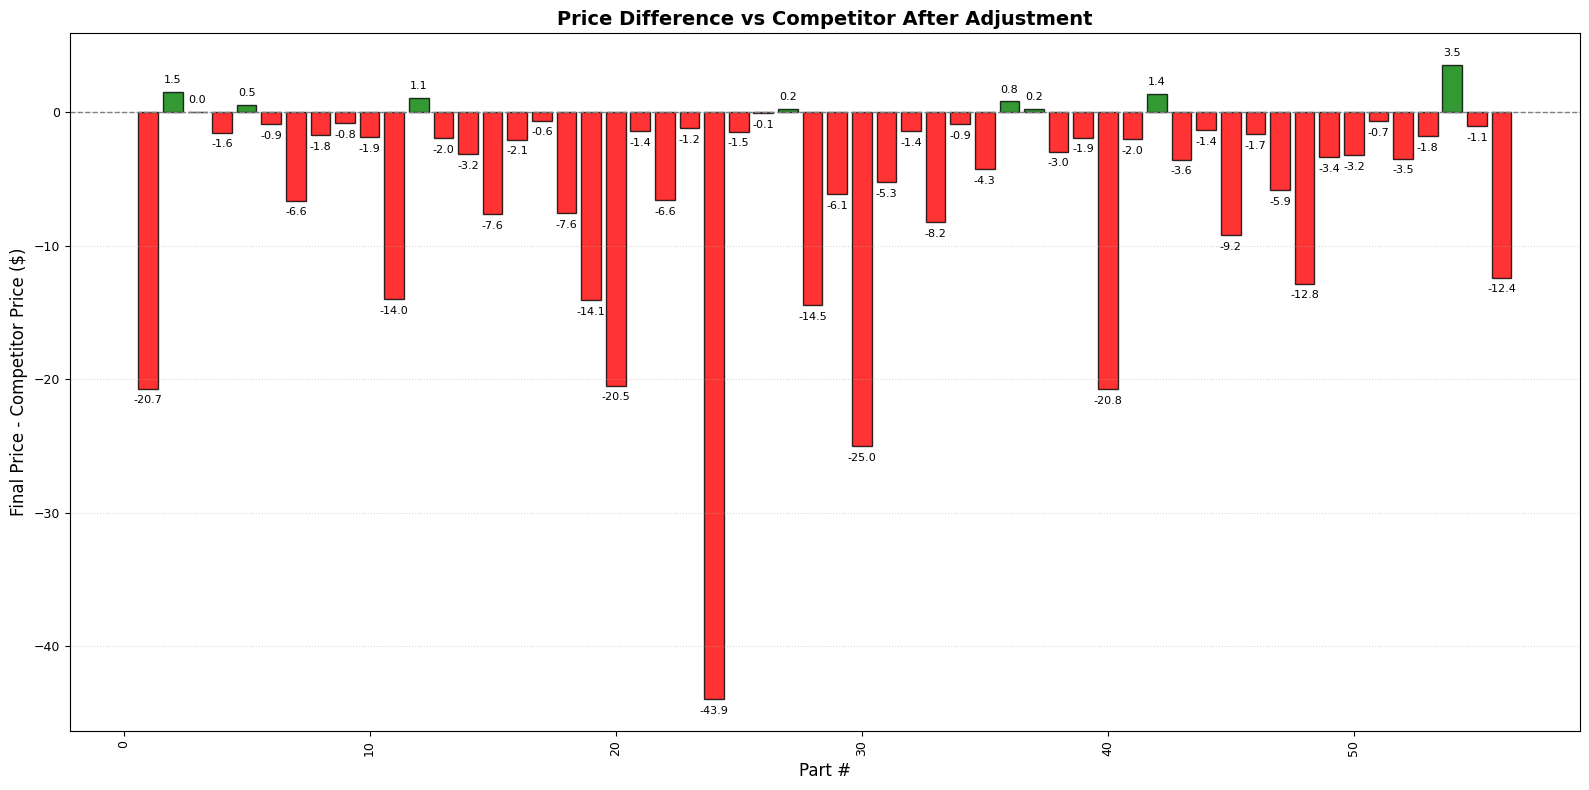

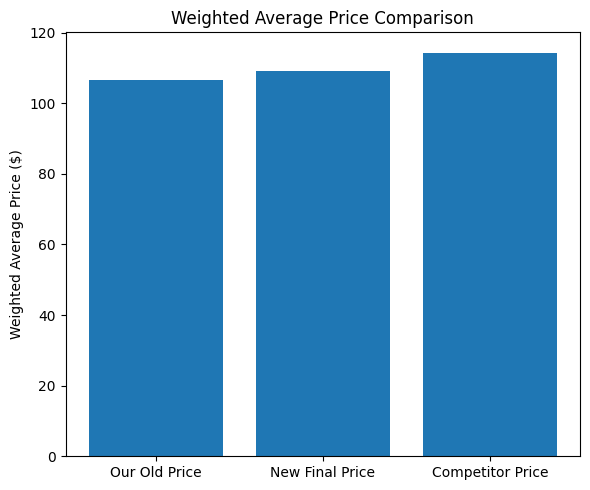

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your CSV file
pricing_final_df = pd.read_csv('CSV Adjust pricing new file.csv')

# Clean column names
pricing_final_df.columns = pricing_final_df.columns.str.strip()

# Remove $ signs and commas from price columns and convert to float
for col in ['Our Blue Price', 'Competitor Price', 'Final Price']:
    pricing_final_df[col] = pricing_final_df[col].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Clean TTM Quantity and Final Revenue
pricing_final_df['TTM Quantity'] = pricing_final_df['TTM Quantity'].replace({',': ''}, regex=True).astype(int)
pricing_final_df['Final Revenue'] = pricing_final_df['Final Revenue'].replace({',': ''}, regex=True).astype(float)

# ------------------- VISUALIZATION 1: Our vs Competitor vs New Final Price -------------------
plt.figure(figsize=(10,6))
plt.scatter(pricing_final_df['Part #'], pricing_final_df['Our Blue Price'], label='Our Old Price')
plt.scatter(pricing_final_df['Part #'], pricing_final_df['Competitor Price'], label='Competitor Price')
plt.scatter(pricing_final_df['Part #'], pricing_final_df['Final Price'], label='New Final Price')
plt.xlabel('Part #')
plt.ylabel('Price ($)')
plt.title('Product Prices Comparison: Our Old vs Competitor vs New Final Price')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
print("\n\n")  # Adds blank lines between outputs

# ------------------- VISUALIZATION 2: % Price Change Distribution -------------------
plt.figure(figsize=(8,5))
price_change = ((pricing_final_df['Final Price'] - pricing_final_df['Our Blue Price']) / pricing_final_df['Our Blue Price']) * 100
plt.hist(price_change, bins=20)
plt.xlabel('% Change in Price from Original')
plt.ylabel('Number of Products')
plt.title('Distribution of % Price Changes (New vs Old)')
plt.tight_layout()
plt.show()
print("\n\n")  # Adds blank lines between outputs


# ------------------- VISUALIZATION 3: Final Revenue Contribution per Product -------------------
plt.figure(figsize=(10,6))
plt.bar(pricing_final_df['Part #'], pricing_final_df['Final Revenue'])
plt.xlabel('Part #')
plt.ylabel('Final Revenue ($)')
plt.title('Final Revenue Contribution by Product')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
print("\n\n")  # Adds blank lines between outputs


# ------------------- VISUALIZATION 4: Price Difference vs Competitor After Adjustment -------------------
plt.figure(figsize=(16,8))
price_diff = pricing_final_df['Final Price'] - pricing_final_df['Competitor Price']

# Define colors based on positive or negative difference
colors = ['green' if val >=0 else 'red' for val in price_diff]

bars = plt.bar(pricing_final_df['Part #'], price_diff, color=colors, edgecolor='black', alpha=0.8)

plt.axhline(0, color='grey', linestyle='--', linewidth=1)
plt.xlabel('Part #', fontsize=12)
plt.ylabel('Final Price - Competitor Price ($)', fontsize=12)
plt.title('Price Difference vs Competitor After Adjustment', fontsize=14, fontweight='bold')
plt.xticks(rotation=90, fontsize=9)
plt.yticks(fontsize=9)
plt.grid(axis='y', linestyle=':', alpha=0.5)

# Add numbers on top or bottom with cleaner formatting
for bar, val in zip(bars, price_diff):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,
             height + (0.5 if val >=0 else -0.5),
             f'{height:.1f}',
             ha='center',
             va='bottom' if val >=0 else 'top',
             fontsize=8,
             rotation=0)

plt.tight_layout()
plt.show()
print("\n\n")  # Adds blank lines between outputs


# ------------------- VISUALIZATION 5: Weighted Average Price Comparison -------------------
# Calculate weighted average prices
weighted_old = (pricing_final_df['Our Blue Price'] * pricing_final_df['TTM Quantity']).sum() / pricing_final_df['TTM Quantity'].sum()
weighted_new = (pricing_final_df['Final Price'] * pricing_final_df['TTM Quantity']).sum() / pricing_final_df['TTM Quantity'].sum()
weighted_comp = (pricing_final_df['Competitor Price'] * pricing_final_df['TTM Quantity']).sum() / pricing_final_df['TTM Quantity'].sum()

plt.figure(figsize=(6,5))
plt.bar(['Our Old Price', 'New Final Price', 'Competitor Price'], [weighted_old, weighted_new, weighted_comp])
plt.ylabel('Weighted Average Price ($)')
plt.title('Weighted Average Price Comparison')
plt.tight_layout()
plt.show()
print("\n\n")  # Adds blank lines between outputs





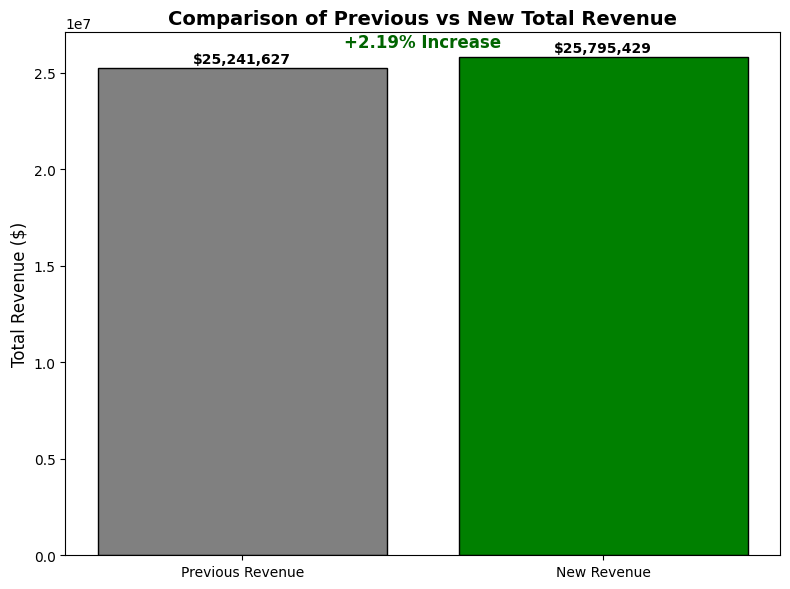

In [12]:
# Calculate previous and new revenue
previous_total_revenue = (pricing_final_df['Our Blue Price'] * pricing_final_df['TTM Quantity']).sum()
new_total_revenue = (pricing_final_df['Final Price'] * pricing_final_df['TTM Quantity']).sum()

# Calculate revenue increase and % increase
revenue_increase = new_total_revenue - previous_total_revenue
revenue_increase_percent = (revenue_increase / previous_total_revenue) * 100

# Plotting the comparison
plt.figure(figsize=(8,6))
bars = plt.bar(['Previous Revenue', 'New Revenue'], [previous_total_revenue, new_total_revenue],
               color=['grey', 'green'], edgecolor='black')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + (0.01 * height), f'${height:,.0f}',
             ha='center', fontsize=10, fontweight='bold')

# Add % increase annotation between bars
plt.text(0.5, max(previous_total_revenue, new_total_revenue) * 1.02,
         f'+{revenue_increase_percent:.2f}% Increase',
         ha='center', fontsize=12, fontweight='bold', color='darkgreen')

plt.ylabel('Total Revenue ($)', fontsize=12)
plt.title('Comparison of Previous vs New Total Revenue', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()
